# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [14]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
customer_df = pd.read_csv("customer_data.csv")
ad_df = pd.read_csv("ad_data.csv")
df = customer_df.merge(ad_df, on='customer_id')
df.head()

,customer_id,state,sex,age,occupation,family_size,income,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased
0,9167,MO,F,42.0,Food Service,1,40343,DISCOUNT-20%,Instagram photo ad,True,"['mexican pizza', 'chicken quesadilla']","['mountain dew', 'mug root beer']"
1,531,MI,F,36.0,Retail,4,41730,DISCOUNT-10%,Instagram photo ad,False,"['steak garlic nacho fries', 'crunchy taco', '...","['mug root beer', 'iced tea', 'starry', 'iced ..."
2,2265,CA,F,25.0,IT,0,84024,DISCOUNT-20%,15 sec YouTube ad,False,['chicken quesadilla'],['mug root beer']
3,7550,VA,M,38.0,Food Service,2,38990,BOGO - Garlic Steak Nacho Fries,15 sec YouTube ad,True,"['steak garlic nacho fries', 'steak garlic nac...","['pepsi', 'diet pepsi', 'diet pepsi']"
4,5334,MT,M,35.0,Food Service,1,33400,DISCOUNT-20%,15 sec YouTube ad,False,"['spicy potato soft taco', 'nachos bellgrande']","['gatorade', 'baja blast']"


### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

<AxesSubplot:>

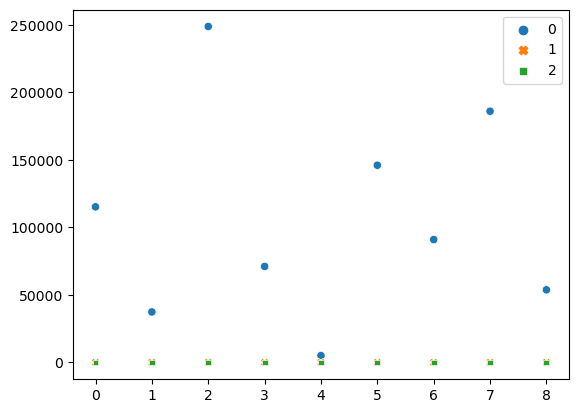

In [13]:

tdf, _ = train_test_split(df, test_size=0.3, random_state=42)
tdf = tdf[["income", "age", "family_size"]]
model = KMeans(n_clusters=9)
model.fit(tdf)

closser = model.cluster_centers_
sns.scatterplot(data= closser)

#### Don't forget to describe the centers of the clusters you found.

# 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

0.5833429478096014

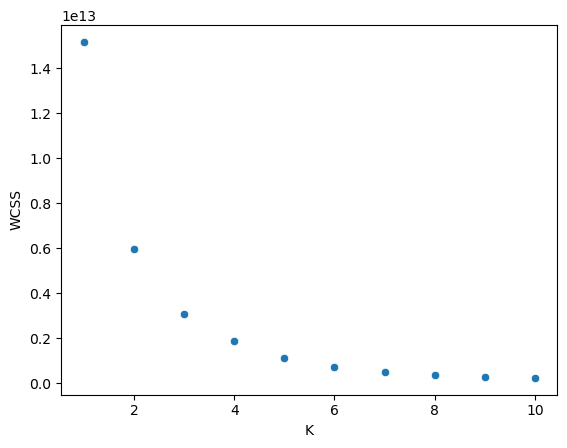

In [15]:
k_values = range(1, 11)
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tdf)
    wcss.append(kmeans.inertia_)


wcss_df = pd.DataFrame({'K': k_values, 'WCSS': wcss})

sns.scatterplot(data= wcss_df, y="WCSS",x= 'K')
silhouette_score(tdf, model.labels_)

#### thet the eldow plot showes where it most effecint being around 3 this can be seen also seen in the silhouette score as it saying that having 3 cluserts give it a score of .58

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

####  the data of the cutering model show the main target for the add whould be people that are old with that are gernaly in the middel class.  this can be seen with  the arge cluter of the hierrer age. this is also seen with income as thire is a learge monjaaroy of lowere class it

#### Link your ad here. https://docs.google.com/document/d/1Vx_qpcpn87DjEQ97VVuLODXz15UZXS_7a3RlMjUNnc0/edit?usp=sharing